## 폐암 수술 환자의 생존율 예측

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

Data_set = np.loadtxt("./dataset/ThoraricSurgery.csv", delimiter = ",") # ndarray

X = Data_set[:, 0:17]
Y = Data_set[:, 17]

model = Sequential()
model.add(Dense(30, input_dim = 17, activation = 'relu')) # layer 추가
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 100, batch_size = 10)
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

In [3]:
print(type(Data_set))
print(Data_set.shape)
print(Data_set.ndim)
Data_set

<class 'numpy.ndarray'>
(470, 18)
2


array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [4]:
Data_set[:, 0:17]

array([[293.  ,   1.  ,   3.8 , ...,   1.  ,   0.  ,  62.  ],
       [  1.  ,   2.  ,   2.88, ...,   1.  ,   0.  ,  60.  ],
       [  8.  ,   2.  ,   3.19, ...,   1.  ,   0.  ,  66.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,   0.  ,  62.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,   0.  ,  58.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,   0.  ,  49.  ]])

In [5]:
print(len(Data_set))
Data_set[:, 17][:10]

470


array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                540       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


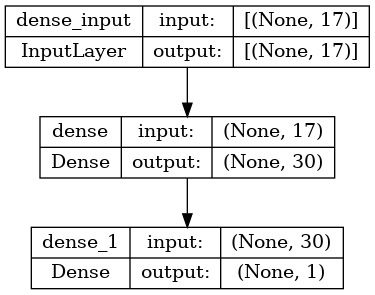

In [9]:
model.summary()

# from keras.utils import plot_model

# plot_model(model, show_shapes= True, show_shapes=True, to_file = './model.png')

from tensorflow import keras

keras.utils.plot_model(model, show_layer_names = True, show_shapes = True, to_file = './keras.png')

## 피마인디언의 당뇨병 예측

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

display(df.head())
display(df.info())
display(df.describe())
print(df[['pregnant', 'class']])

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [15]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by = 'pregnant', ascending = True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


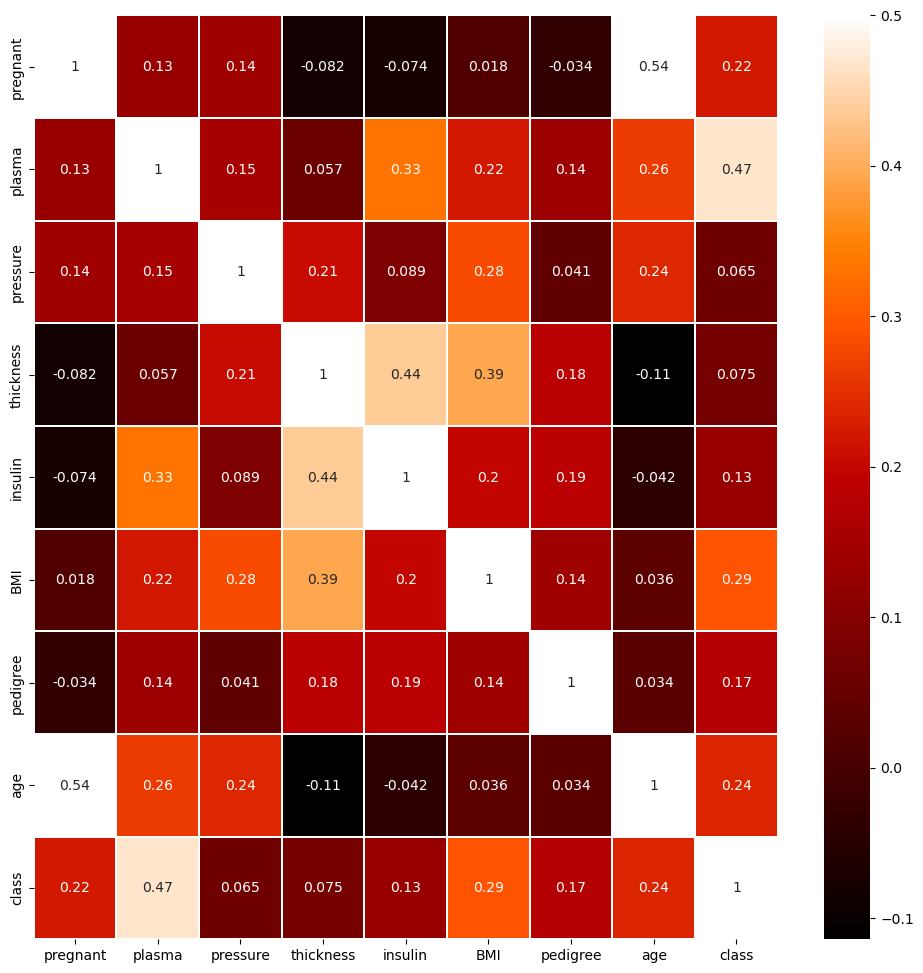

In [16]:
colormap = plt.cm.gist_heat
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = colormap, linecolor = 'white', annot = True)
plt.show()

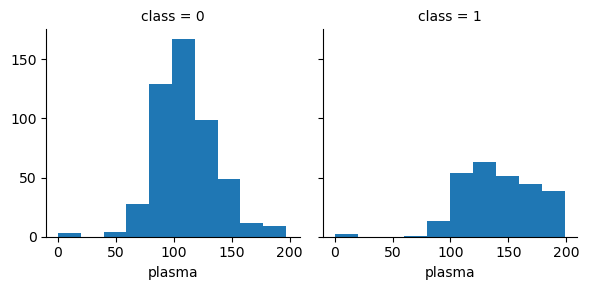

In [17]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [29]:
print(type(df.corr()))

<class 'pandas.core.frame.DataFrame'>


In [35]:
df.corr().loc['class', :].drop(['class']).sort_values(ascending=False)

plasma       0.466581
BMI          0.292695
age          0.238356
pregnant     0.221898
pedigree     0.173844
insulin      0.130548
thickness    0.074752
pressure     0.065068
Name: class, dtype: float64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

numpy.random.seed(3)
tf.random.set_seed(3)

dataset = numpy.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 10)

print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

## 아이리스 다중 분류 예측

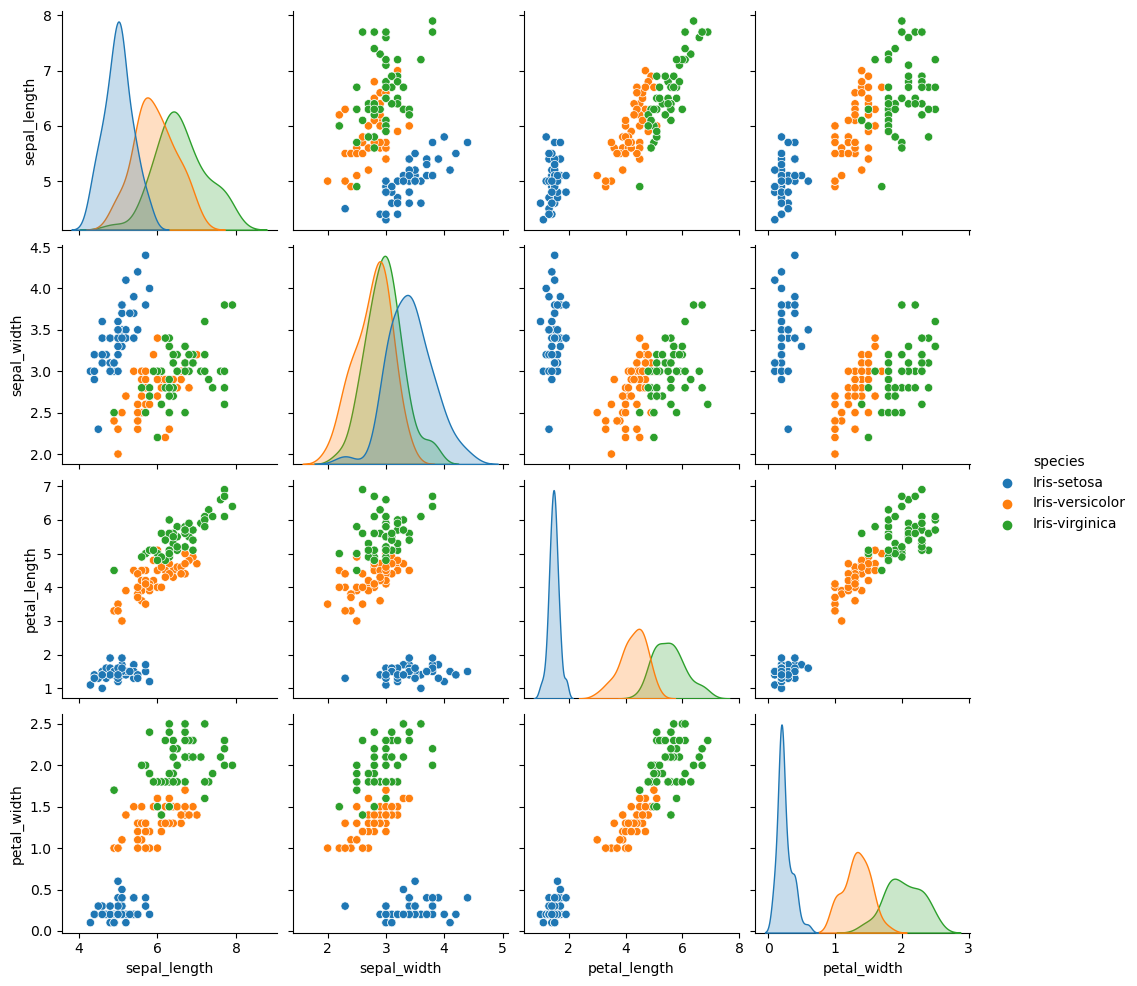

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./dataset/iris.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

sns.pairplot(df, hue = 'species')
plt.show()

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y) # OneHotEncoding

display(X[:5]); print(type(X), type(Y_encoded))
Y_encoded[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X, Y_encoded, epochs = 50, batch_size = 1)

print('\n Accuracy: %.4f' % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50


2022-10-19 14:42:52.742052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 14:42:52.742583: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 14:42:52.742633: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jeon2slaptop
2022-10-19 14:42:52.742657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jeon2slaptop
2022-10-19 14:42:52.742772: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-10-19 14:42:52.742810: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.76.0
2022-10-19 14:42:52.743070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This 

150/150 [==============================] - 0s 1ms/step - loss: 1.3259 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.8409 - accuracy: 0.6333
Epoch 3/50
150/150 [==============================] - 0s 995us/step - loss: 0.7110 - accuracy: 0.7267
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6867
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7933
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.9067
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.9067
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.9733
Epoch 11

## 초음파 광물 예측

In [12]:
import pandas as pd
df = pd.read_csv('./dataset/sonar.csv', header = None)
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [15]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [16]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

numpy.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./dataset/sonar.csv', header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 200, batch_size = 5)

print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5913
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.6587
Epoch 4/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.7067
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7644
Epoch 6/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7500
Epoch 7/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.7644
Epoch 8/200
42/42 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7740
Epoch 9/200
42/42 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7788
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.7788
Epoch 11/

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 24)                1464      
                                                                 
 dense_3 (Dense)             (None, 10)                250       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


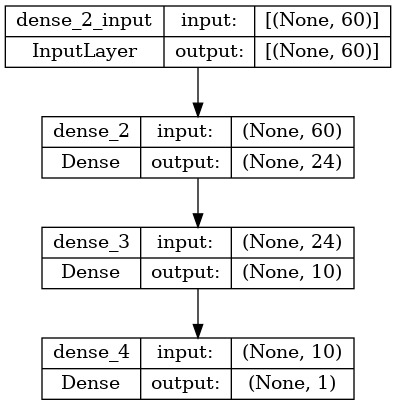

In [19]:
model.summary()

from tensorflow import keras

keras.utils.plot_model(model, show_layer_names = True, show_shapes = True)

In [20]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('./dataset/sonar.csv', header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 130, batch_size = 5)

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.8069
Epoch 11/

### 모델의 개선을 유도하는 콜백 함수:
- ModelCheckpoint(모델 가중치 중간 저장)
- EarlyStopping(모델 성능이 개선되지 않을 때 학습 조기 종료)
- ReduceLROnPlateau(Learning Rate를 조절)

In [2]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

numpy.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./dataset/sonar.csv', header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Early Stopping
es = EarlyStopping(monitor = 'loss', mode = 'auto', patience = 5, verbose = 1)

# Checkpoint
model_checkpoint = './{epoch:06d}-{acc:0.6f}.ckpt'

checkpointer = ModelCheckpoint(filepath = model_checkpoint, verbose = 1, save_freq = 2, \
    save_best_weights = True, mode = 'auto', monitor = 'acc', save_best_only = True)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'loss', patience = 5, mode = 'auto', verbose = 1, factor = 0.2)

model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 5e-5), metrics = ['acc']) # 'acc'
model.fit(X_train, Y_train, epochs = 130, batch_size = 5, callbacks = [es, reduce_lr, checkpointer], verbose=1)

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130


2022-10-19 16:23:45.574953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 16:23:45.574996: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 16:23:45.575018: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jeon2slaptop
2022-10-19 16:23:45.575040: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jeon2slaptop
2022-10-19 16:23:45.575172: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-10-19 16:23:45.575211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.76.0
2022-10-19 16:23:45.575439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This 

 1/29 [>.............................] - ETA: 9s - loss: 0.2559 - acc: 0.6000
Epoch 1: saving model to ./000001-0.400000.ckpt
INFO:tensorflow:Assets written to: ./000001-0.400000.ckpt/assets
 2/29 [=>............................] - ETA: 18s - loss: 0.2685 - acc: 0.4000
Epoch 1: saving model to ./000001-0.500000.ckpt
INFO:tensorflow:Assets written to: ./000001-0.500000.ckpt/assets
 4/29 [===>..........................] - ETA: 10s - loss: 0.2513 - acc: 0.5000
Epoch 1: saving model to ./000001-0.500000.ckpt
INFO:tensorflow:Assets written to: ./000001-0.500000.ckpt/assets
 6/29 [=====>........................] - ETA: 8s - loss: 0.2516 - acc: 0.5000 
Epoch 1: saving model to ./000001-0.475000.ckpt
INFO:tensorflow:Assets written to: ./000001-0.475000.ckpt/assets
 8/29 [=======>......................] - ETA: 7s - loss: 0.2522 - acc: 0.4750
Epoch 1: saving model to ./000001-0.540000.ckpt
INFO:tensorflow:Assets written to: ./000001-0.540000.ckpt/assets
10/29 [=========>....................] - E

## model 저장 및 불러오기

In [3]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('./dataset/sonar.csv', header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 130, batch_size = 5)
model.save('./keraforsonar.h5')
del model
# model = load_model('keraforsonar.h5')

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6483
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.6069
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.6966
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.7517
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7448
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7448
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7931
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7793
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.8000
Epoch 11/

In [5]:
# del model
model = load_model('keraforsonar.h5')

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.9193 - accuracy: 0.8571

 Test Accuracy: 0.8571


## Stratified K-folds

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('./dataset/sonar.csv', header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, suffle = True, random_state = seed)

accuracy = []

for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

print('\n %.f fold accuracy:' % n_fold, accuracy)